In [1]:
import pandas as pd
pd.set_option('display.max_columns',21)
dados = pd.read_csv('C:/Users/carlo/Documents\Projetos/Machine Learning Funções/Banco de dados/Pnad21.csv',sep = ";")
dados.head()

,Idade,Cor,Sexo,Regiao,Ocupacao,Renda,Escolaridade,Classe_Social
0,51,4,1,4,4,3.0,5,3
1,45,4,2,4,2,3.0,5,1
2,26,4,1,4,6,3.0,6,1
3,23,4,2,4,6,3.0,5,1
4,55,1,1,4,4,3.0,5,3


In [2]:
# Function Limpar Na
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.int64)

In [3]:
#Padroniza com int
clean_dataset(dados)
dados.astype('int64').dtypes
print(len(dados))

134330


In [4]:
#Definindo váriaveis preditoras e variavel target
y = dados['Classe_Social'] # Target
x = dados.drop('Classe_Social', axis =1) # Preditoras

In [9]:
#Tratamentos
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt

#Metricas
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score   
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from datetime import datetime
from skopt import BayesSearchCV
from sklearn.model_selection import KFold

#Separação Dados
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


class Treinamento:
       
    def TreinarRF(self,x,y):
        start_time = datetime.now()

        #Import modelo
        from sklearn.ensemble import RandomForestClassifier
                
        #Grid
        param_list = {'n_estimators': [100, 200, 300],
                      'max_depth': [None, 10, 20],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4],
                      'max_features': ['auto', 'sqrt']
                        } #Trocar parametros
        
        model = RandomForestClassifier(random_state=42)
        
        modelo = GridSearchCV(estimator = model, param_grid = param_list, cv = 5)
        scores = cross_val_score(modelo, x, y, cv=5, scoring = 'accuracy',n_jobs=-1)
        
        print("Score: {:.2f} | {:.2f}".format(np.mean(scores), np.std(scores)))
        print(modelo.get_params(True)) 
            
        
        end_time = datetime.now() # Mostrar tempo de execução
        print('Duration: {}'.format(end_time - start_time))
        
        # Plot non-normalized confusion matrix
        plot = modelo.fit(x, y)
        #Nome das variáveis
        class_names = ["trabalhadores manuais","média alta","média baixa"]
            
        titles_options = [
            ("Confusion matrix, Quantidade", None),
            ("\nConfusion matrix, Porcentagem", "true"),
        ]
        for title, normalize in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(
                plot,
                x,
                y,
                display_labels=class_names,
                cmap=plt.cm.Blues,
                normalize=normalize,
            )
            disp.ax_.set_title(title)

        plt.show()

        return model
    
    
##############################################################
    def TreinarRDecisionTree(self,x,y):
        
        from datetime import datetime
        start_time = datetime.now()
        
        #Import modelo
        from sklearn.tree import DecisionTreeClassifier
        
        #Parametros
        param_list = {'criterion': ['gini', 'entropy'],
                      'max_depth': [None, 5, 10],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4],
                      'max_features': ['auto', 'sqrt']
                        } # Trocar parametros
        model = DecisionTreeClassifier(random_state=42)
        
        #Modelo Grid
        modelo = GridSearchCV(estimator = model, param_grid = param_list, cv = 5) 
        
        #Modelo
        scores = cross_val_score(modelo, x, y, cv=5,scoring = 'accuracy',n_jobs=-1)
        print("Score: {:.2f} | {:.2f}".format(np.mean(scores), np.std(scores)))
        print(modelo.get_params(True))
       
        end_time = datetime.now() # Mostrar tempo de execução
        print('Duration: {}'.format(end_time - start_time))
        
        # Plot non-normalized confusion matrix
        plot = modelo.fit(x, y)

        #Nome das variáveis
        class_names = ["trabalhadores manuais","média alta","média baixa"]
            
        titles_options = [
            ("Confusion matrix, Quantidade", None),
            ("\nConfusion matrix, Porcentagem", "true"),
        ]
        for title, normalize in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(
                plot,
                x,
                y,
                display_labels=class_names,
                cmap=plt.cm.Blues,
                normalize=normalize,
            )
            disp.ax_.set_title(title)

        plt.show()

        return model

################################################################################
    def TreinarKNN(self,x,y):
        
        from datetime import datetime
        start_time = datetime.now()
        #Import modelo
        from sklearn.neighbors import KNeighborsClassifier
        
        
        from sklearn.decomposition import PCA
        pca = PCA(n_components=7)
        x_pca = pca.fit_transform(x)
        
        #Parametros
        param_list = {'n_neighbors': [3, 5, 7],
                      'weights': ['uniform', 'distance'],
                      'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                      'p': [1, 2]
                        }# Trocar parametros
        
        model = KNeighborsClassifier()
        
        #Modelo Grid
        modelo = GridSearchCV(estimator = model, param_grid = param_list, cv = 5) 
        
        cv= KFold(n_splits=42)
        #Modelo
        scores = cross_val_score(modelo, x_pca, y, cv=cv,scoring = 'accuracy',n_jobs=-1)
        print("Score: {:.2f} | {:.2f}".format(np.mean(scores), np.std(scores)))
        print(modelo.get_params(True))
    
        end_time = datetime.now() # Mostrar tempo de execução
        print('Duration: {}'.format(end_time - start_time))
        
        # Plot non-normalized confusion matrix
        plot = modelo.fit(x_pca, y)
        #Nome das variáveis
        class_names = ["trabalhadores manuais","média alta","média baixa"]
            
        titles_options = [
            ("Confusion matrix, Quantidade", None),
            ("\nConfusion matrix, Porcentagem", "true"),
        ]
        for title, normalize in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(
                plot,
                x_pca,
                y,
                display_labels=class_names,
                cmap=plt.cm.Blues,
                normalize=normalize,
            )
            disp.ax_.set_title(title)

        plt.show()

        return model
#######################################################################################
   ###### SVM #####   
    def TreinarSVC(self,x,y):
        
        from datetime import datetime
        start_time = datetime.now()
        
        #Import modelo
        from sklearn.svm import SVC
        
        #Parametros
        #param_list = {
         #               'C': [0.1, 1.0],
          #              'kernel': ['rbf'],
           #             'gamma': ['scale', 'auto'],
            #            'degree': [2, 3],
             #           'class_weight': [None, 'balanced']
              #      } # Trocar parametros
        model = SVC( random_state=42)
        
        #Modelo Grid
       # modelo = GridSearchCV(estimator = model, cv = 5) 
        
        #Modelo
        scores = cross_val_score(model, x, y, cv=5,scoring = 'accuracy',n_jobs=-1)
        print("Score: {:.2f} | {:.2f}".format(np.mean(scores), np.std(scores)))
        print(model.get_params(True))

       
        end_time = datetime.now() # Mostrar tempo de execução
        print('Duration: {}'.format(end_time - start_time))
        
        # Plot non-normalized confusion matrix
        plot = model.fit(x, y)
        #Nome das variáveis
        class_names = ["trabalhadores manuais","média alta","média baixa"]
            
        titles_options = [
            ("Confusion matrix, Quantidade", None),
            ("\nConfusion matrix, Porcentagem", "true"),
        ]
        for title, normalize in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(
                plot,
                x,
                y,
                display_labels=class_names,
                cmap=plt.cm.Blues,
                normalize=normalize,
            )
            disp.ax_.set_title(title)

        plt.show()

        return model
        
########################################################################################
    def TreinarRLogistica(self,x,y):
        
        from datetime import datetime
        start_time = datetime.now()
        
        #Import modelo
        from sklearn.linear_model import LogisticRegression
    
       #Parametros
        param_list = {'penalty': ['l1', 'l2'],
                      'C': [0.1, 1.0, 10.0],
                      'solver': ['liblinear', 'saga'],
                      'max_iter': [100, 200, 500]
                        } # Trocar parametros
        model = LogisticRegression( random_state=42)
        
        #Modelo Grid
        modelo = GridSearchCV(estimator = model, param_grid = param_list, cv = 5) 
        
        #Modelo
        scores = cross_val_score(modelo, x, y, cv=5,scoring = 'accuracy',n_jobs=-1)
        print("Score: {:.2f} | {:.2f}".format(np.mean(scores), np.std(scores)))
        print(modelo.get_params(True))
       
       
        end_time = datetime.now() # Mostrar tempo de execução
        print('Duration: {}'.format(end_time - start_time))
        
        # Plot non-normalized confusion matrix
        plot = modelo.fit(x, y)
        #Nome das variáveis
        class_names = ["trabalhadores manuais","média alta","média baixa"]
            
        titles_options = [
            ("Confusion matrix, Quantidade", None),
            ("\nConfusion matrix, Porcentagem", "true"),
        ]
        for title, normalize in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(
                plot,
                x,
                y,
                display_labels=class_names,
                cmap=plt.cm.Blues,
                normalize=normalize,
            )
            disp.ax_.set_title(title)

        plt.show()

        return model
        
#####################################################################################
    def TreinarNaiveBayes(self,x,y):
        
        from datetime import datetime
        start_time = datetime.now()
        
        #Import modelo
        from sklearn.naive_bayes import GaussianNB
    
       #Parametros
        param_list = {'priors': [None, [0.25, 0.75], [0.5, 0.5], [0.75, 0.25]]} # Trocar parametros
        
        model = GaussianNB()
        
        #Modelo Grid
        modelo = GridSearchCV(estimator = model ,param_grid = param_list, cv = 5) 
        
        #Modelo
        cv= KFold(n_splits=42)
        scores = cross_val_score(modelo, x, y, cv=cv,scoring = 'accuracy',n_jobs=-1)
        print("Score: {:.2f} | {:.2f}".format(np.mean(scores), np.std(scores)))
        print(modelo.get_params(True))


        end_time = datetime.now() # Mostrar tempo de execução
        print('Duration: {}'.format(end_time - start_time))
       
       
        # Plot non-normalized confusion matrix
        plot = modelo.fit(x, y)
        #Nome das variáveis
        class_names = ["trabalhadores manuais","média alta","média baixa"]
            
        titles_options = [
            ("Confusion matrix, Quantidade", None),
            ("\nConfusion matrix, Porcentagem", "true"),
        ]
        for title, normalize in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(
                plot,
                x,
                y,
                display_labels=class_names,
                cmap=plt.cm.Blues,
                normalize=normalize,
            )
            disp.ax_.set_title(title)

        plt.show()

        return model
###########################################################################################################
    def TreinarMLP(self,x,y):
        
        from datetime import datetime
        start_time = datetime.now()
        
        #Import modelo
        from sklearn.neural_network import MLPClassifier
    
        #Parametros ChatGpt       
        
        #Parametros
        #param_list ={"hidden_layer_sizes": [(100,), (300,),(500,),(300,300,),(500,500,)],
        #             "activation": ["tanh","relu"],
        #             "solver": ["sgd","adam","lbfgs"],
        #             "learning_rate":["adaptive"]}# Trocar parametros
        
        #Modelo
        model = MLPClassifier(random_state=42)
        
        #Modelo Grid
        #modelo = GridSearchCV(estimator = model, param_grid = param_list, cv = 5) 
        
        #Modelo
        scores = cross_val_score(model, x, y, cv=5,scoring = 'accuracy',n_jobs=-1)
        
        print("Score: {:.2f} | {:.2f}".format(np.mean(scores), np.std(scores)))
        print(model.get_params(True))
       
       
        end_time = datetime.now() # Mostrar tempo de execução
        print('Duration: {}'.format(end_time - start_time))
        
        
        # Plot non-normalized confusion matrix
        plot = model.fit(x, y)
        #Nome das variáveis
        class_names = ["trabalhadores manuais","média alta","média baixa"]
            
        titles_options = [
            ("Confusion matrix, Quantidade", None),
            ("\nConfusion matrix, Porcentagem", "true"),
        ]
        for title, normalize in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(
                plot,
                x,
                y,
                display_labels=class_names,
                cmap=plt.cm.Blues,
                normalize=normalize,
            )
            disp.ax_.set_title(title)

        plt.show()

        return model

    #####################################################################   
      
    def TreinarRidge(self,x,y):
        
        from datetime import datetime
        start_time = datetime.now()
        
        #Import modelo
        from sklearn.linear_model import RidgeClassifier
    
        #Parametros
        param_list = {  'alpha': [0.1, 1.0, 10.0],
                        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                        'fit_intercept': [True, False],
                        'normalize': [True, False],
                        'max_iter': [1000, 2000, 5000]
                    } # Trocar parametros
        model = RidgeClassifier(random_state=42)
        
        #Modelo Grid
        modelo = GridSearchCV(estimator = model, param_grid = param_list, cv = 5) 
        
        #Modelo
        scores = cross_val_score(modelo, x, y, cv=5,scoring = 'accuracy',n_jobs=-1)
        print("Score: {:.2f} | {:.2f}".format(np.mean(scores), np.std(scores)))
        print(modelo.get_params(True))
        
        end_time = datetime.now() # Mostrar tempo de execução
        print('Duration: {}'.format(end_time - start_time))
        
        
        # Plot non-normalized confusion matrix
        plot = modelo.fit(x, y)
        #Nome das variáveis
        class_names = ["trabalhadores manuais","média alta","média baixa"]
            
        titles_options = [
            ("Confusion matrix, Quantidade", None),
            ("\nConfusion matrix, Porcentagem", "true"),
        ]
        for title, normalize in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(
                plot,
                x,
                y,
                display_labels=class_names,
                cmap=plt.cm.Blues,
                normalize=normalize,
            )
            disp.ax_.set_title(title)

        plt.show()
        
        return model
    



Score: 0.89 | 0.01
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Duration: 0:07:09.516240


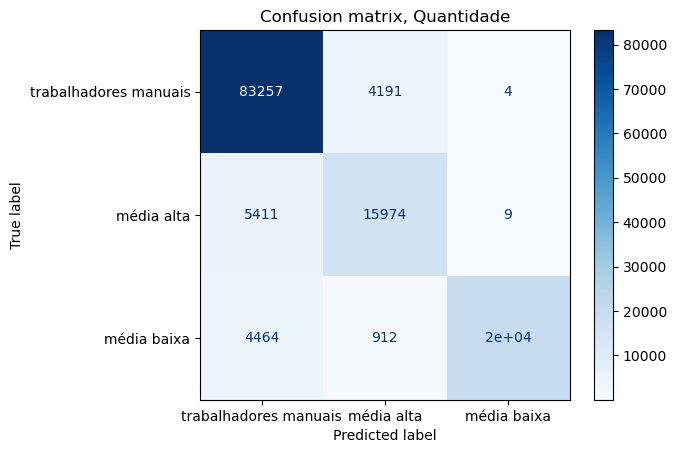

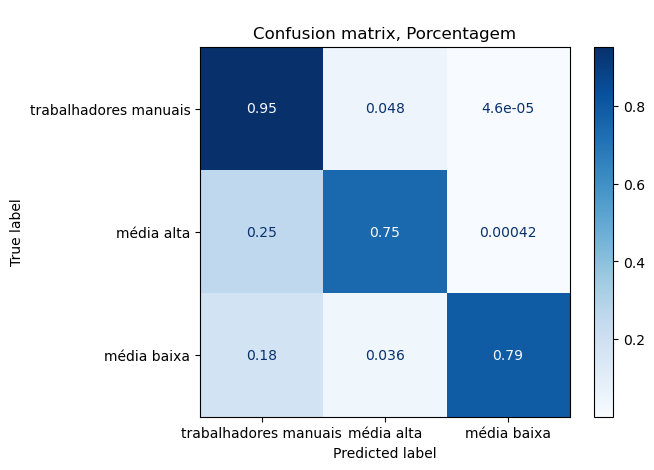

SVC(random_state=42)

In [10]:
trein = Treinamento()
trein.TreinarSVC(x,y)